# Linear Regression on Boston Housing Data

Import data and all necessary libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
boston = pd.read_csv('BostonHousing.csv')

In [2]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In order to check for the assumption of linearity, I created a new dataframe with all of the data except for the target variable, `medv`, which was dropped so that we can comapre the linearity of each column to it.

In [5]:
data = boston.drop('medv', axis=1)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
def linearity_check(df, target):
    for column in df:
        plt.scatter(df[column], target, label=column)
        plt.xlabel(column)
        plt.ylabel('Median Value')
        plt.title ('Linearity Assumption Check')
        plt.legend()
        plt.show()

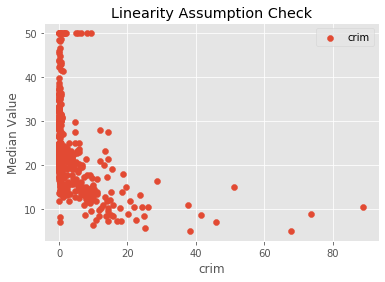

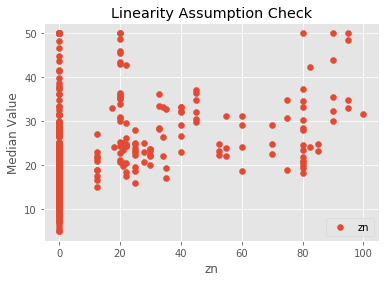

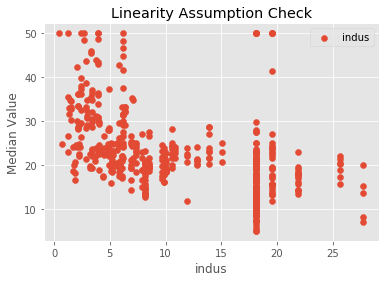

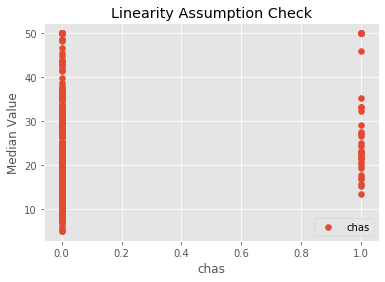

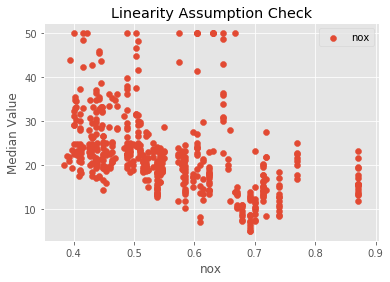

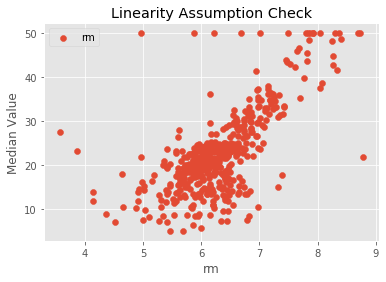

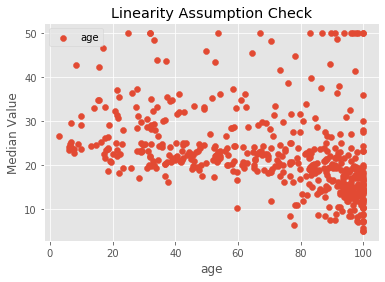

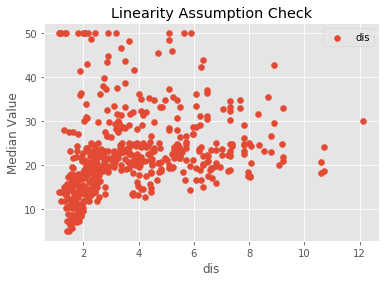

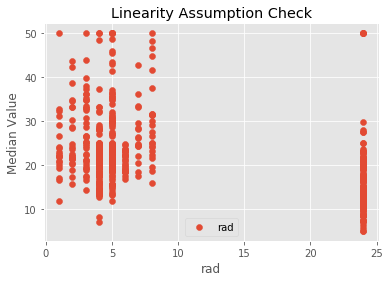

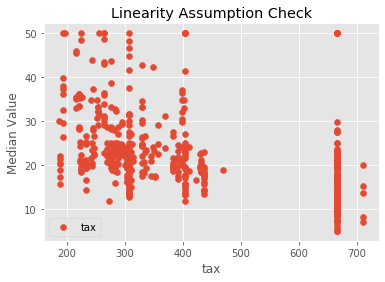

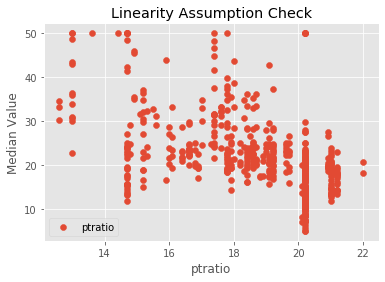

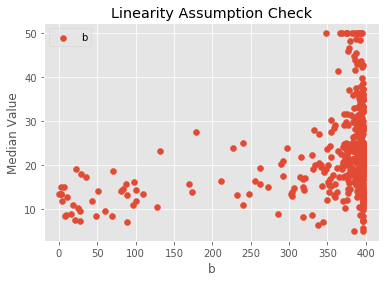

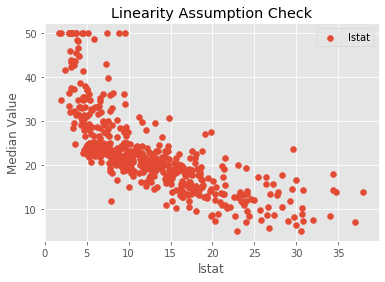

In [7]:
linearity_check(data, boston.medv)

Next, I am going to create histograms for each variable to make an initial normality analysis

In [8]:
def normality_check(df):
    df.hist(figsize=(20,12) );

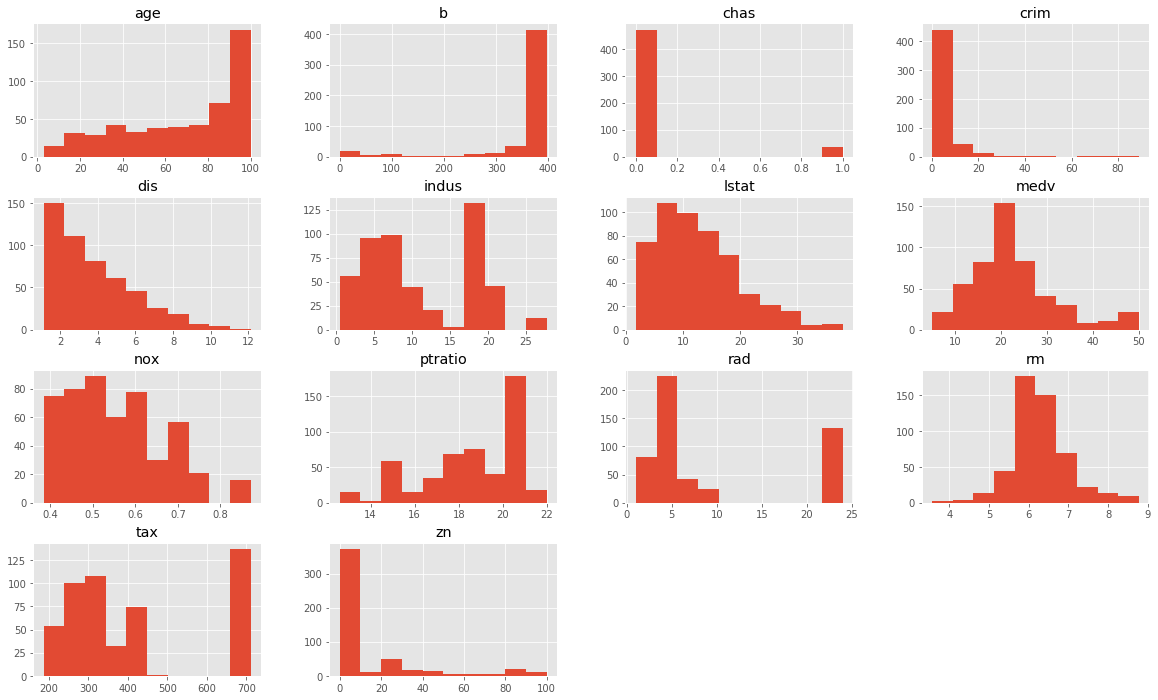

In [9]:
normality_check(boston)

Based on the histograms, there is quite a bit of skewness and kurtosis in these variables, particularly in variables such as `dis` and `age`. Most variables definitely have evidence of outliers, such as `rad` and `tax`.

Below is a summary of my initial findings reagrding the linearity and normality assumptions for each variable *before* removing outliers:

* `crim` - No linearity, outliers are noticeable, continuous variable
* `zn` - No linearity, can't determine outliers from visual, categorical variable
* `indus` - No linearity, appears to have outliers, categorical variable
* `chas` - No linearity, maybe a couple outliers, categorical variable
* `nox` - No linearity, outliers present, from visual looks categorical, however need to look at column description
* `rm` - Linearity present, outliers apparent, continuous variable
* `age` - No linearity, outliers everywhere, ' continuous variable
* `dis` - Perhaps slight linearity, outliers present, continuous variable
* `rad` - No linearity, a few outliers, categorical variable
* `tax` - No linearity, outliers present, categorical variable
* `ptratio` - No linearity, outliers present, categorical variable
* `b` - No linearity, outliers present, continuous variable
* `lstat` - Linearity present, few outliers, continuous variable

Next, I will remove outliers so that I can observe any changes in linearity or normality.

In [10]:
def find_outliers(col):
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)

In [11]:
df_clean = pd.DataFrame()
for col in boston.columns:
    idx = find_outliers(boston[col])
    df_clean[col] = idx

In [12]:
idx_outliers = df_clean.any(axis=1)
df_clean_final = boston[idx_outliers==False]
df_clean_final.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 505
Data columns (total 14 columns):
crim       415 non-null float64
zn         415 non-null float64
indus      415 non-null float64
chas       415 non-null int64
nox        415 non-null float64
rm         415 non-null float64
age        415 non-null float64
dis        415 non-null float64
rad        415 non-null int64
tax        415 non-null int64
ptratio    415 non-null float64
b          415 non-null float64
lstat      415 non-null float64
medv       415 non-null float64
dtypes: float64(11), int64(3)
memory usage: 48.6 KB


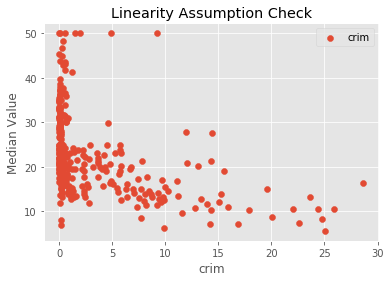

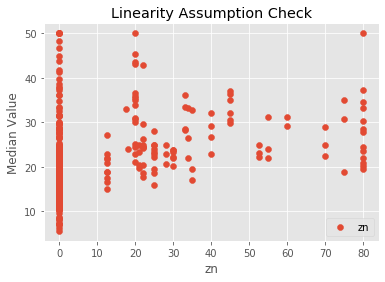

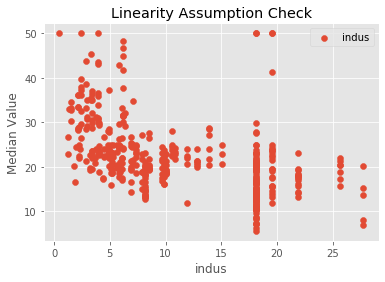

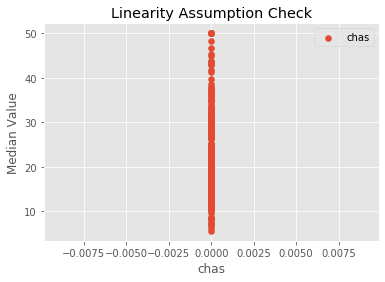

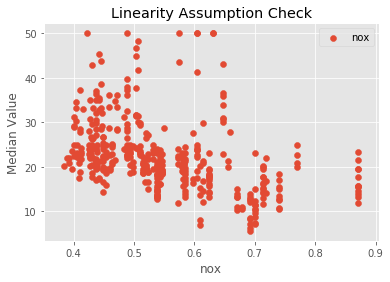

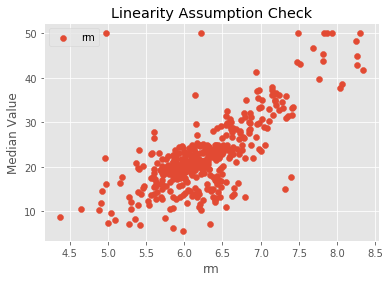

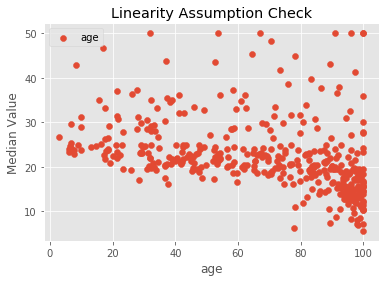

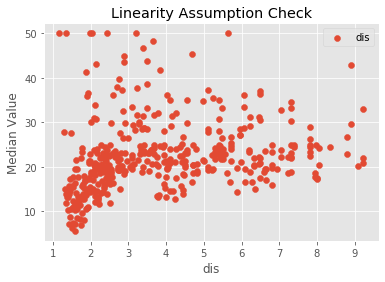

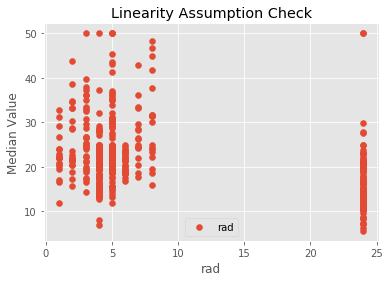

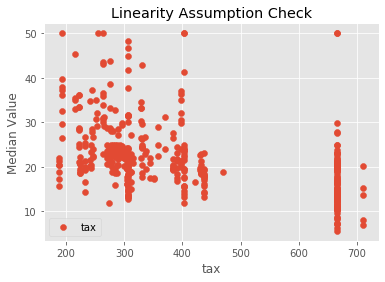

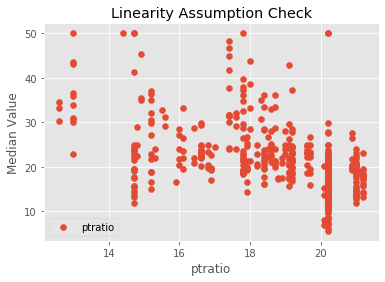

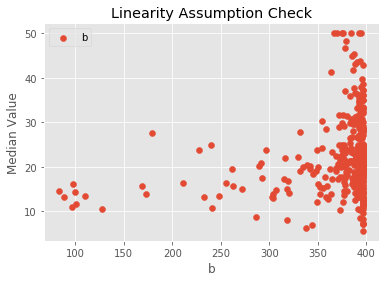

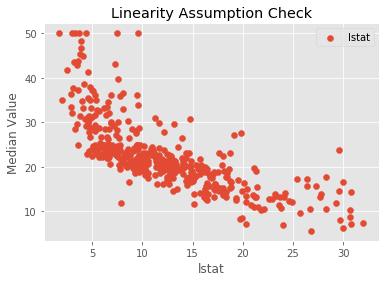

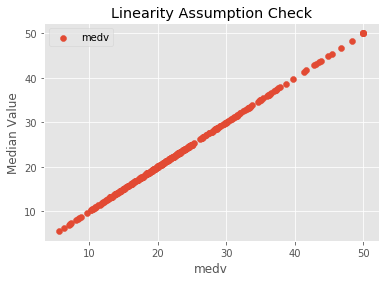

In [14]:
linearity_check(df_clean_final, df_clean_final.medv)

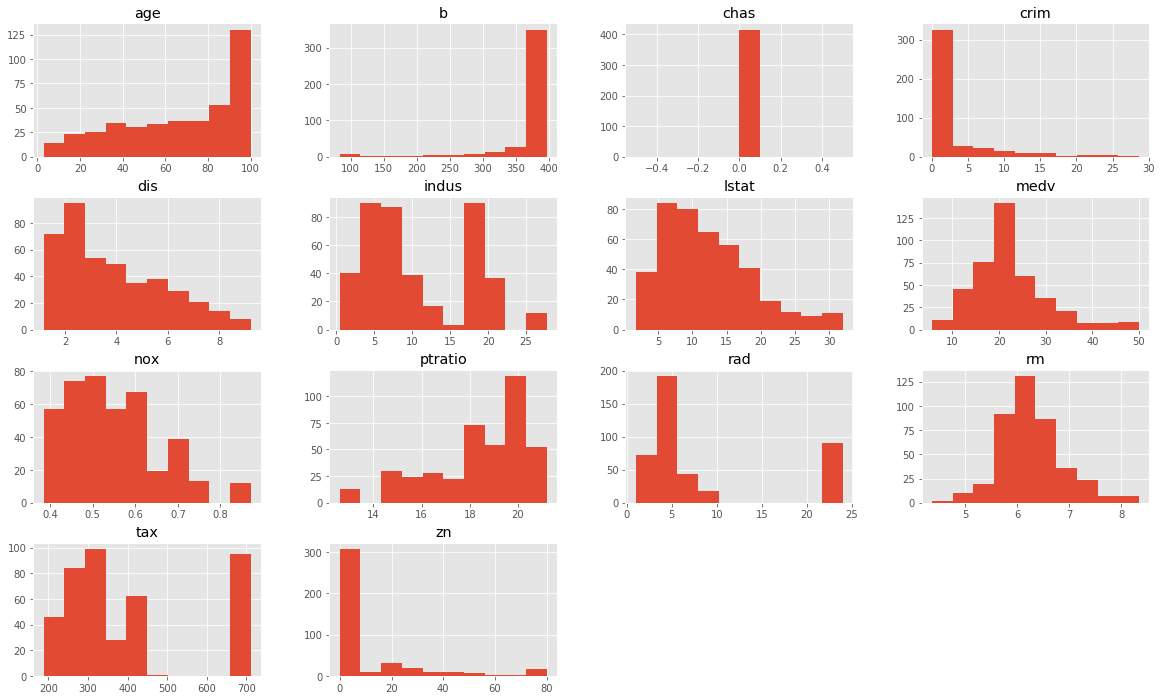

In [15]:
normality_check(df_clean_final)

In [16]:
def heatmap(df):

    import seaborn as sns

    sns.set(style="white")

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(22, 12))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

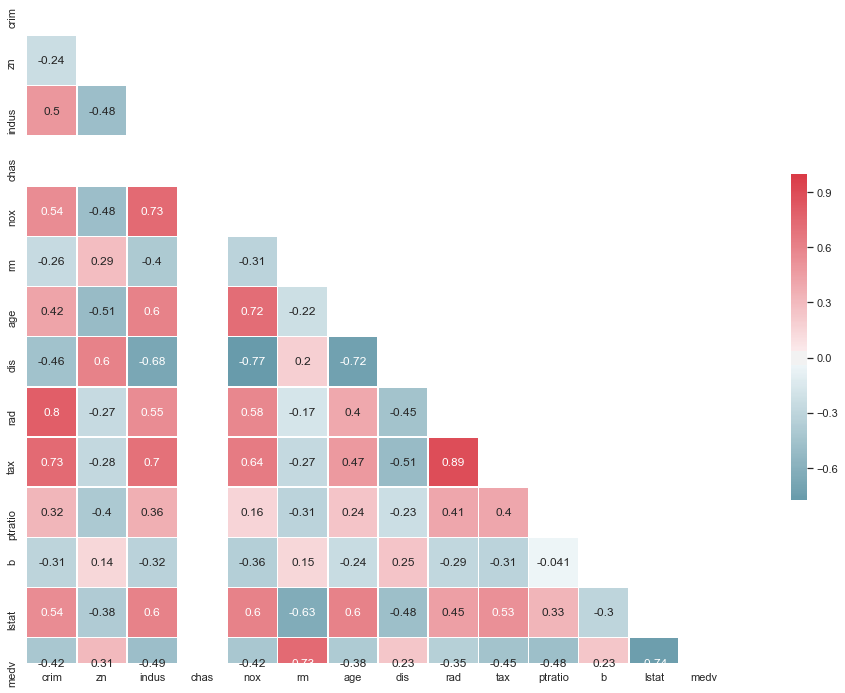

In [17]:
heatmap(df_clean_final)

No results appeared for `chas`, so it will be dropped.

In [18]:
df_clean_final.drop(['chas'],axis=1,inplace=True)
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 505
Data columns (total 13 columns):
crim       415 non-null float64
zn         415 non-null float64
indus      415 non-null float64
nox        415 non-null float64
rm         415 non-null float64
age        415 non-null float64
dis        415 non-null float64
rad        415 non-null int64
tax        415 non-null int64
ptratio    415 non-null float64
b          415 non-null float64
lstat      415 non-null float64
medv       415 non-null float64
dtypes: float64(11), int64(2)
memory usage: 45.4 KB


/Users/acusiobivona/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


There is a multicollinearity issue between `rad`, `crim` and `tax`, so I am going to drop `rad` and recreate the heatmap. This should resolve the issue between all three.

In [19]:
df_clean_final.drop(['rad'],axis=1,inplace=True)
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 505
Data columns (total 12 columns):
crim       415 non-null float64
zn         415 non-null float64
indus      415 non-null float64
nox        415 non-null float64
rm         415 non-null float64
age        415 non-null float64
dis        415 non-null float64
tax        415 non-null int64
ptratio    415 non-null float64
b          415 non-null float64
lstat      415 non-null float64
medv       415 non-null float64
dtypes: float64(11), int64(1)
memory usage: 42.1 KB


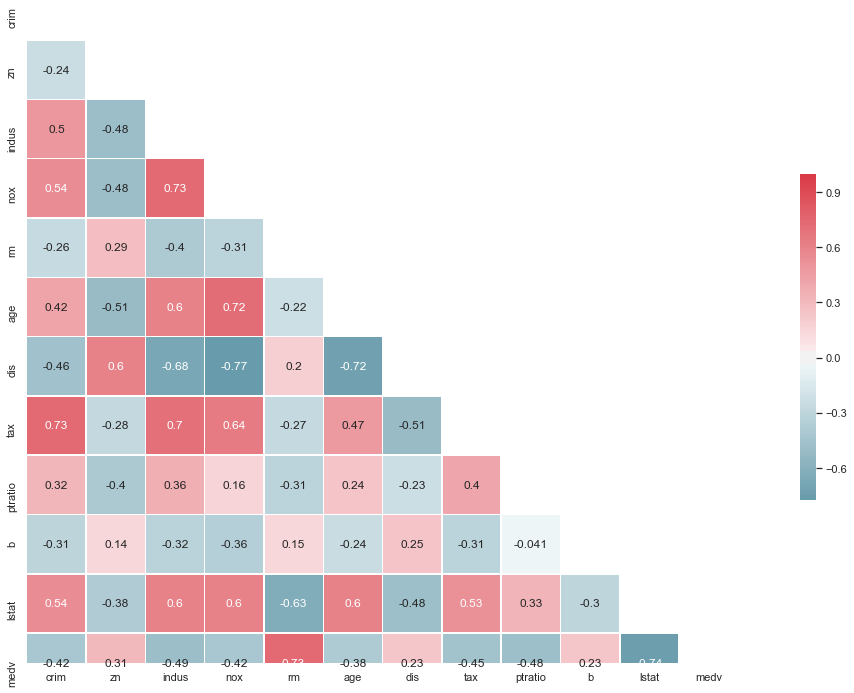

In [20]:
heatmap(df_clean_final)

The major multicollinearity issues have been resolved. There a couple of mildly high scores, such as 0.73, but I'm going to go forward with things as they stand so that there are more variables to explore. If results are not very good, then I wll explore potentially removing a/some variable(s).

## Feature Selection

To begin, I am going to start by observing the 2 highest scored variables with the target variable, `medv`: `rm` and `zn`. This will be just a beginning analysis because `dis` and `b` have a tied score. If results on these first two variables are poor, then I will explore the latter two to see what we get. 

In [21]:
def scatter_plot(df, x, y):
    df.plot(x, y, kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


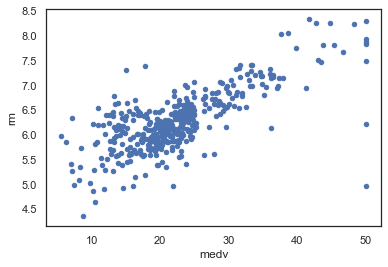

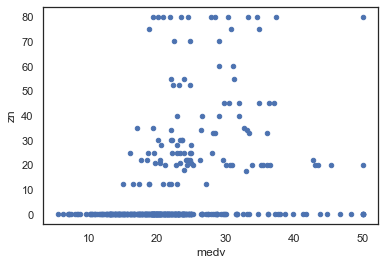

In [22]:
scatter_plot(df_clean_final, 'medv', 'rm')
scatter_plot(df_clean_final, 'medv', 'zn')

There appears to be a linear relationship between `medv` and `rm`, but not `medv` and `zn`.